In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [2]:
csv_file_path = r'amz_uk_price_prediction_dataset.csv'
df_original = pd.read_csv(csv_file_path)
df = df_original.copy()

In [7]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [10]:
frequency_table = df['category'].value_counts()
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

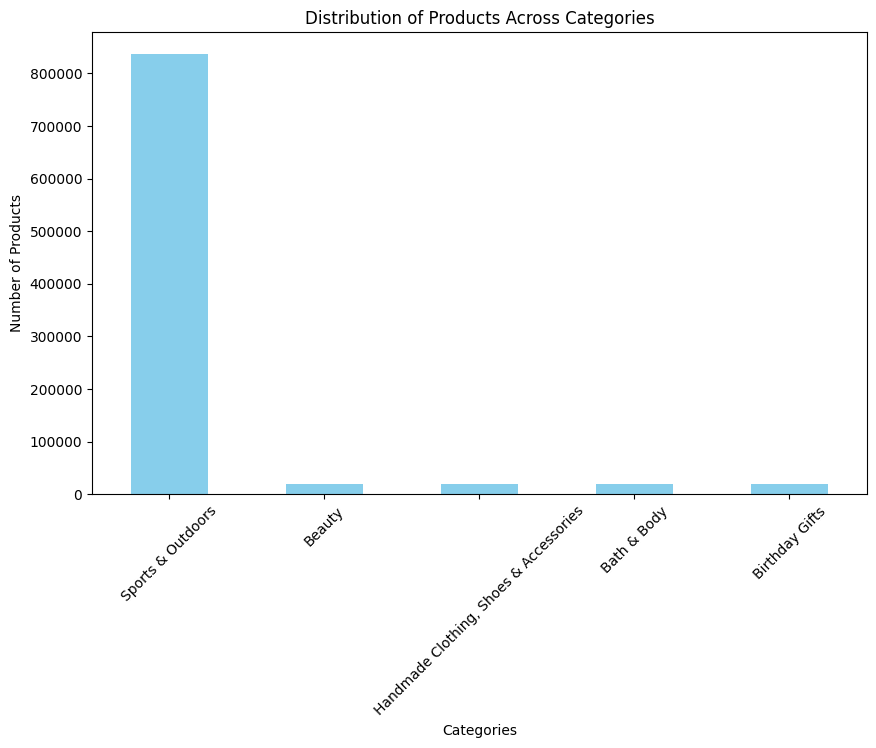

In [17]:
category_counts = frequency_table.head(5)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

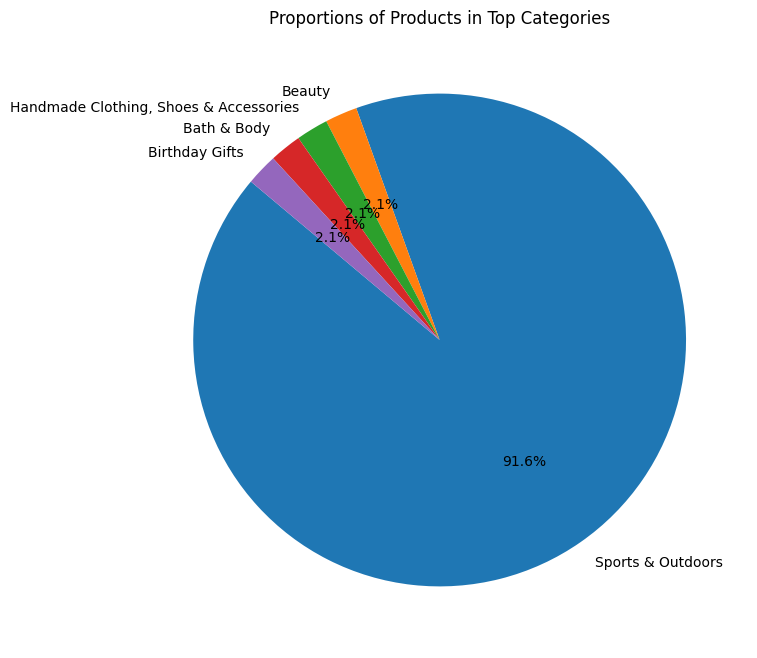

In [24]:
top_categories = category_counts.head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Products in Top Categories')
plt.show()

As we can see sports & outdoors really dominates the listings. For this reason only the top 5 contenders where chosen 

In [35]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().iloc[0]

print("Mean price:", mean_price)
print("Median price:", median_price)
print("Mode price:", mode_price)

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99


Here we see that the average price point, mean, is way higher than the mode. Such a big difference suggests that there a probably some items with a way higher price making the mean go up.

In [44]:
var_price = round(df['price'].var(), 2)
std_price = round(df['price'].std(),2)
price_range = df['price'].max() - df['price'].min()

iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print("Variance:", var_price)
print("Standard deviation:", std_price)
print("Range:", price_range)
print("Interquartile range:", iqr_price)

Variance: 119445.49
Standard deviation: 345.61
Range: 100000.0
Interquartile range: 36.0


We observe a wide spread of prices. The variance is higher than the rangee,thist indicates that the values in the dataset are more spread out from the mean compared to the overall range of values.

<Axes: xlabel='price', ylabel='Count'>

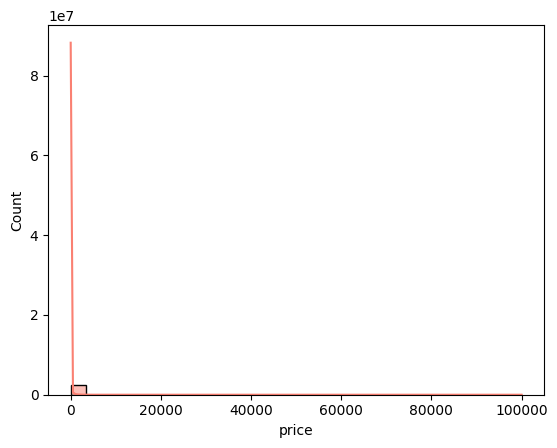

In [50]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")


<Axes: xlabel='price', ylabel='Count'>

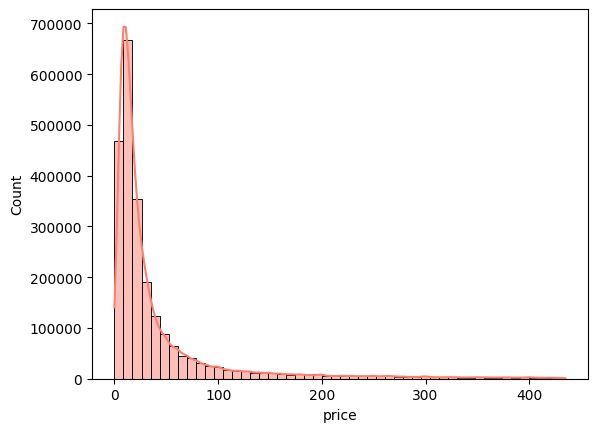

In [90]:
df['price_zscore'] = zscore(df['price'])
threshold = 1

filtered_df_price = df[df['price_zscore'] <= threshold]
sns.histplot(filtered_df_price['price'], kde=True, bins=50, color="salmon")

Becasue we observed some severe oultiers we decided to take them out using a z score giving a less destorted view of the price range. These outliers are also shonw in the boxplot below.

<Axes: ylabel='price'>

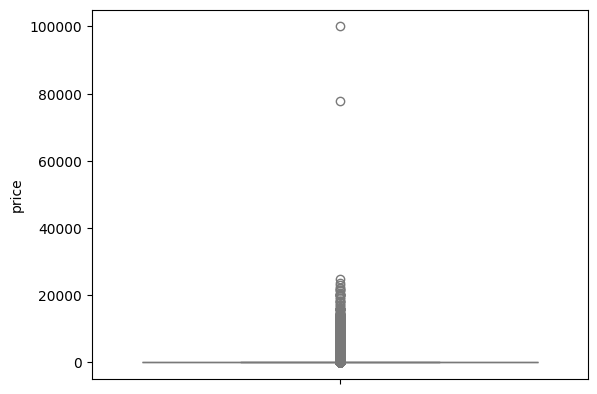

In [51]:
sns.boxplot(data = df['price'], color="lightblue")

When no ratings have been placed a value of 0 is assigned. These are taken out from the dataset.

In [83]:
filtered_df = df[df['stars'] != 0]
mean_rating = filtered_df['stars'].mean()
median_rating = filtered_df['stars'].median()
mode_rating = filtered_df['stars'].mode().iloc[0]

print("Mean rating:", mean_rating)
print("Median rating:", median_rating)
print("Mode rating:", mode_rating)

Mean rating: 4.31916076222691
Median rating: 4.4
Mode rating: 4.5


It seems like most of the customers will give a product between 4.1 and 4.6 stars. With some outliers to the left where customers gave the prodyct a single star.

In [85]:
filtered_df['stars'].describe()

count    1.218010e+06
mean     4.319161e+00
std      5.552868e-01
min      1.000000e+00
25%      4.100000e+00
50%      4.400000e+00
75%      4.600000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [86]:
var_rating = round(filtered_df['stars'].var(), 2)
std_rating = round(filtered_df['stars'].std(),2)
range_rating = filtered_df['stars'].max() - filtered_df['stars'].min()

iqr_price = filtered_df['stars'].quantile(0.75) - filtered_df['stars'].quantile(0.25)

print("Variance:", var_rating)
print("Standard deviation:", std_rating)
print("Range:", range_rating)
print("Interquartile range:", iqr_price)

Variance: 0.31
Standard deviation: 0.56
Range: 4.0
Interquartile range: 0.5


It seems that customers give a consistent rating between 4.1 and 4.6

In [88]:
skewness_price = filtered_df['stars'].skew()
kurtosis_price = filtered_df['stars'].kurtosis()

skewness_price, kurtosis_price

(-2.3795681122127945, 9.78193769066435)

The skweness shows we have a tail to te left. However most of the scores are between 4.1 amd 4.6

<Axes: xlabel='stars', ylabel='Count'>

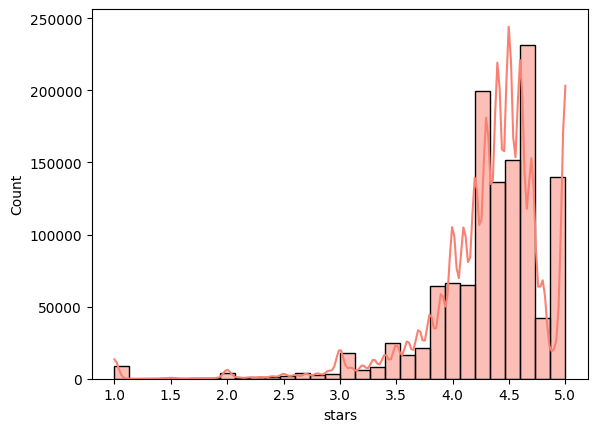

In [91]:
sns.histplot(filtered_df['stars'], kde=True, bins=30, color="salmon")